# Processador de Currículos com SpaCy


## 1. Carregar Dados

In [36]:
import pandas as pd
import numpy as np
import spacy
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt


data = "/content/drive/MyDrive/Colab Notebooks/LAMIA/Fastcamp_LLM/1. Fundamentos de NLP/resume.csv"
df_resume = pd.read_csv(data)

In [2]:
df_resume.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
#Categorias de ocupação
df_resume.Category.unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [4]:
df_resume.shape

(2484, 4)

In [5]:
#reindexando e reduzindo a lista
df_resume = df_resume.reindex(np.random.permutation(df_resume.index))
df_resume = df_resume.copy().iloc[:1000, ]
df_resume.shape


(1000, 4)

## 2. Carregar dados de habilidades

Definição dos padrões de habilidades

In [6]:
# lista de habilidades desejadas
!python -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md') #carrega o modelo
skill = "/content/drive/MyDrive/Colab Notebooks/LAMIA/Fastcamp_LLM/1. Fundamentos de NLP/skills.jsonl"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 18.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Adicionando entity ruler ao pipeline do nlp

In [7]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill) # carregando os padrões de habilidade no ruler
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [8]:
doc = nlp("Beware, Davi is learning")
doc.ents

(Davi,)

## 3. Extraindo dados do banco de ocupações

In [9]:
df_resume.head()

,ID,Resume_str,Resume_html,Category
391,17481570,ASSISTANT TEACHER Summary A...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER
2103,31211074,CITY CARRIER ASSISTANT Professi...,"<div class=""fontsize fontface vmargins hmargin...",PUBLIC-RELATIONS
404,21531811,PRESCHOOL TEACHER Summary En...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER
1343,97449528,OFFICE SUPPORT COORDINATOR Summ...,"<div class=""fontsize fontface vmargins hmargin...",AUTOMOBILE
165,51681660,PRODUCTION DESIGNER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",DESIGNER


In [10]:
df_resume.iloc[1]['Resume_str']

"         CITY CARRIER ASSISTANT       Professional Summary     A results-oriented, service-driven psychology professional who is an analytic problem solver capable of insightful decision making. A skilled troubleshooter able to synthesize disparate pieces of data, draw meaningful conclusions, and execute a concise implementation plan. An astute project manager who can also function as an efficient team leader but who can also operate as a team player demonstrating common sense, working effectively in highly pressurized workplace settings filled with shifting priorities and tight time-frames. An influential consensus builder possessing finely honed interpersonal ability with a proven record of exhibiting personal integrity at all organizational levels.       Skill Highlights         Microsoft Office Suite (Word, PowerPoint, Outlook and Excel), SPSS (Research Data), Public Relations, Crisis Management, Relationship Building, Project Management, Customer Service, Quality Consciousness, a

In [11]:
#limpado os dados
def preprocessing(sentence):

  doc = nlp(sentence)
  clean_tokens = []
  for token in doc:
    #remove stopwords, pontuaçao, símbolos e espaço
    if not token.is_stop and token.pos_ != 'PUNCT' and token.pos_ != 'SYM'and token.pos_ != 'SPACE':
      #Lemmatiza palavras minúsculas e sem espaço
      clean_tokens.append(token.lemma_.lower().strip())

  return " ".join(clean_tokens)


In [12]:
random_resume = df_resume.Resume_str.iloc[5]
random_resume[:300]

'         ASSISTANT MANAGER           Summary    General Associates with emphasis in Business Admin. and Communications Current 3.0 GPA Volunteer Junior Achievement teacher Grades 1st and 3rd 3 yrs. as a volunteer in special needs classroom Routinely helped as many as 350 customers each day in a high'

In [13]:
#cuccículo pré processado.
preprocessing(random_resume[:300])

'assistant manager summary general associates emphasis business admin communications current 3.0 gpa volunteer junior achievement teacher grades 1st 3rd 3 yr volunteer special need classroom routinely help 350 customer day high'

## Extraindo habilidades

In [14]:
#aplicando o pré processamento em todos os currículos do dataframe
df_resume['Clean_resume'] = df_resume['Resume_str'].apply(preprocessing)


In [15]:
df_resume.head()

,ID,Resume_str,Resume_html,Category,Clean_resume
391,17481570,ASSISTANT TEACHER Summary A...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER,assistant teacher summary organized profession...
2103,31211074,CITY CARRIER ASSISTANT Professi...,"<div class=""fontsize fontface vmargins hmargin...",PUBLIC-RELATIONS,city carrier assistant professional summary re...
404,21531811,PRESCHOOL TEACHER Summary En...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER,preschool teacher summary enthusiastic prescho...
1343,97449528,OFFICE SUPPORT COORDINATOR Summ...,"<div class=""fontsize fontface vmargins hmargin...",AUTOMOBILE,office support coordinator summary highly qual...
165,51681660,PRODUCTION DESIGNER Summary ...,"<div class=""fontsize fontface vmargins hmargin...",DESIGNER,production designer summary specialize art dep...


In [16]:
def get_skills(text):

  doc = nlp(text)
  skills = []

  for ent in doc.ents:
    if ent.label_ == 'SKILL':
      skills.append(ent.text)
  return skills

def unique_skills(x):
  return list(set(x))


In [17]:
 df_resume['Skills'] = df_resume.Clean_resume.apply(get_skills)
df_resume['Skills'] = df_resume.Skills.apply(unique_skills)

In [21]:
df_resume.Skills.iloc[6]

['support',
 'business',
 'deployment',
 'ranking',
 'advertising',
 'shell',
 'security',
 'schedule']

## Visualização

In [25]:
#set(df_resume.Category)

focando em  tecnologia da informação

In [26]:
category = 'INFORMATION-TECHNOLOGY'
cond = df_resume.Category == category

In [27]:
df_resume_it = df_resume[cond]
df_resume_it.shape

(52, 6)

In [31]:
#concatenando todas as skills nos curriculos
all_skills = np.concatenate(df_resume_it.Skills.values)

In [30]:
all_skills


array(['medium', 'support', 'business', 'business intelligence',
       'software', 'monitoring', 'local area network', 'deployment',
       'project management', 'documentation', 'communications', 'design',
       'database', 'security', 'testing', 'schedule', 'specification',
       'certificate', 'software', 'communications', 'project management',
       'data analysis', 'design', 'marketing', 'business administration',
       'business', 'monitoring', 'operating system', 'documentation',
       'specification', 'encryption', 'deployment', 'synchronization',
       'enterprise information security architecture', 'security',
       'business process', 'analytics', 'windows', 'authentication',
       'support', 'software', 'collaboration', 'linux', 'design',
       'network security', 'business', 'monitoring', 'database',
       'documentation', 'oracle', 'specification', 'component',
       'engineering', 'functional testing', 'security', 'testing',
       'schedule', 'time tracking'

In [35]:
#ordenando as 10 habilidades mais comuns
counting = Counter(all_skills)
counting = OrderedDict(counting.most_common(10))
counting

OrderedDict([(np.str_('support'), 47),
             (np.str_('software'), 44),
             (np.str_('design'), 38),
             (np.str_('business'), 37),
             (np.str_('security'), 34),
             (np.str_('server'), 31),
             (np.str_('project management'), 28),
             (np.str_('database'), 28),
             (np.str_('windows'), 27),
             (np.str_('documentation'), 23)])

<BarContainer object of 10 artists>

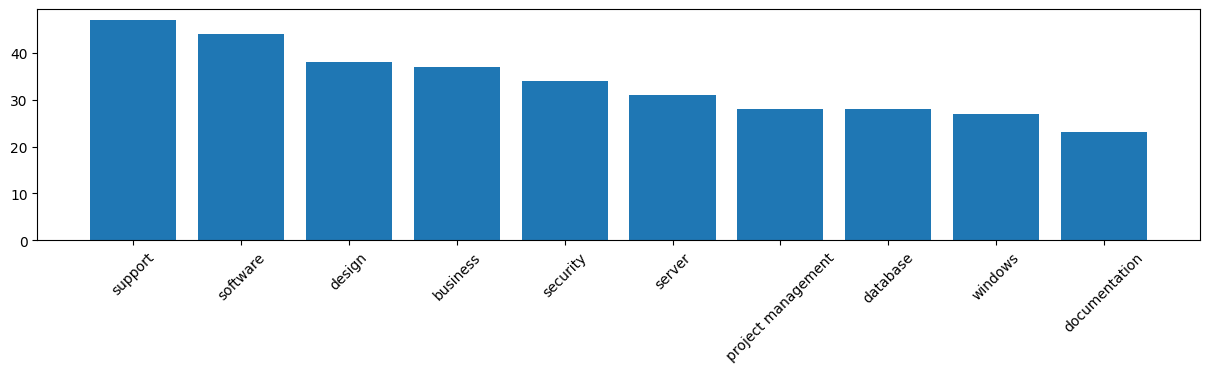

In [37]:
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)

plt.bar(counting.keys(), counting.values())

## Name entity recognition

In [39]:
from spacy import displacy
text = df_resume_it.Clean_resume.iloc[2]
doc = nlp(text)

In [40]:
displacy.render(doc, style='ent')

# processando PDF

In [43]:
!pip install pypdf2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.6 MB/s eta 0:00:00


In [44]:
from PyPDF2 import PdfReader

In [50]:
reader = PdfReader("/content/drive/MyDrive/Colab Notebooks/LAMIA/Fastcamp_LLM/1. Fundamentos de NLP/Resume2025_1.pdf")
page = reader.pages[0]
text = page.extract_text()

In [52]:
text = preprocessing(text)

In [53]:
doc = nlp(text)

In [54]:
displacy.render(doc, style='ent')